# Interspeech


In [1]:
import matplotlib.pyplot

In [2]:
import numpy as np
import pandas as pd

import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from sklearn.model_selection import train_test_split
import random

import keras
from keras import backend as K
from keras import layers

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D

from keras.layers.core import Dense, Permute, Reshape
from keras.layers.normalization import BatchNormalization
from keras.layers.wrappers import Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.regularizers import l2

import tensorflow as tf

Using TensorFlow backend.


In [3]:
global X, T
X=[]
T=[]

In [4]:
def loaddata(filename,num):
    f=sio.loadmat(filename)
    data=f['cep']
    data=np.asarray(data)
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    data=(data-mean)/std
    data=np.asarray(np.vsplit(data[0:int(data.shape[0]/data.shape[1])*data.shape[1]],int(data.shape[0]/data.shape[1])))
    for i in range (data.shape[0]):
        X.append(data[i])
        T.append(num)
    return X, T

In [5]:
X,T = loaddata('assamese.mat',0)
len(X), len(T)

(5704, 5704)

In [6]:
X,T = loaddata('bengali.mat',1)
len(X), len(T)

(8880, 8880)

In [7]:
X,T = loaddata('kannada.mat',2)
len(X),len(T)

(15135, 15135)

In [8]:
X,T = loaddata('malayalam.mat',3)
len(X),len(T)

(18272, 18272)

In [9]:
X,T = loaddata('punjabi.mat',4)
len(X),len(T)

(21083, 21083)

In [10]:
X,T = loaddata('rajasthani.mat',5)
len(X),len(T)

(24092, 24092)

In [11]:
X,T = loaddata('tamil.mat',6)
len(X),len(T)

(27027, 27027)

In [12]:
X,T = loaddata('telugu.mat',7)
len(X),len(T)

(29906, 29906)

## Split Dataset

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(np.array(X),np.array(T), train_size=0.8, random_state=30)
np.array(Xtrain).shape, np.array(Xtest).shape

c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((23924, 39, 39), (5982, 39, 39))

## Convert 2D dataset to a 1D vector

In [14]:
batchSize=128
num_classes=8
epochs=100
imageRows, imageCols =39,39

In [15]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], imageRows, imageCols, 1)
Xtest = Xtest.reshape(Xtest.shape[0], imageRows,imageCols, 1)
input_shape = (imageRows, imageCols, 1)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

In [16]:
input_shape

(39, 39, 1)

In [17]:
Ytrain = keras.utils.to_categorical(Ytrain, num_classes)
Ytest = keras.utils.to_categorical(Ytest, num_classes)

## Define CNN Model

In [18]:
weight_decay = 0.001

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # (bs, y, x, c) --> (bs, x, y, c)
model.add(Permute((2, 1, 3)))

    # (bs, x, y, c) --> (bs, x, y * c)
bs, x, y, c = model.layers[-1].output_shape
model.add(Reshape((x, y*c)))

model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
model.add(Dense(num_classes, activation="softmax"))


c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(39, 39, 1..., kernel_regularizer=<keras.reg...)`
  """
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  del sys.path[0]
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_si

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 39, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 39, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 19, 19, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         295168    
__________

## Model Train

In [20]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [21]:
speechTrainData=model.fit(Xtrain, Ytrain,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(Xtest, Ytest))

Train on 23924 samples, validate on 5982 samples
Epoch 1/100
23924/23924 [==============================] - 27s 1ms/step - loss: 2.2796 - acc: 0.7471 - val_loss: 2.8311 - val_acc: 0.6065
Epoch 2/100
23924/23924 [==============================] - 22s 909us/step - loss: 1.2482 - acc: 0.9256 - val_loss: 1.2719 - val_acc: 0.8566
Epoch 3/100
23924/23924 [==============================] - 22s 913us/step - loss: 0.8392 - acc: 0.9499 - val_loss: 0.8206 - val_acc: 0.9199
Epoch 4/100
23924/23924 [==============================] - 22s 911us/step - loss: 0.6219 - acc: 0.9595 - val_loss: 0.9280 - val_acc: 0.8485
Epoch 5/100
23924/23924 [==============================] - 22s 909us/step - loss: 0.4909 - acc: 0.9650 - val_loss: 0.5777 - val_acc: 0.9258
Epoch 6/100
23924/23924 [==============================] - 22s 912us/step - loss: 0.4172 - acc: 0.9709 - val_loss: 0.5091 - val_acc: 0.9330
Epoch 7/100
23924/23924 [==============================] - 22s 909us/step - loss: 0.3687 - acc: 0.9727 - val_loss

Epoch 59/100
23924/23924 [==============================] - 22s 910us/step - loss: 0.1395 - acc: 0.9908 - val_loss: 0.2201 - val_acc: 0.9687
Epoch 60/100
23924/23924 [==============================] - 22s 911us/step - loss: 0.1360 - acc: 0.9907 - val_loss: 0.2528 - val_acc: 0.9594
Epoch 61/100
23924/23924 [==============================] - 22s 911us/step - loss: 0.1412 - acc: 0.9899 - val_loss: 0.2802 - val_acc: 0.9545
Epoch 62/100
23924/23924 [==============================] - 22s 910us/step - loss: 0.1410 - acc: 0.9905 - val_loss: 0.2434 - val_acc: 0.9632
Epoch 63/100
23924/23924 [==============================] - 22s 910us/step - loss: 0.1309 - acc: 0.9919 - val_loss: 0.3106 - val_acc: 0.9472
Epoch 64/100
23924/23924 [==============================] - 22s 907us/step - loss: 0.1413 - acc: 0.9895 - val_loss: 0.2133 - val_acc: 0.9714
Epoch 65/100
23924/23924 [==============================] - 22s 910us/step - loss: 0.1319 - acc: 0.9920 - val_loss: 0.2950 - val_acc: 0.9472
Epoch 66/100


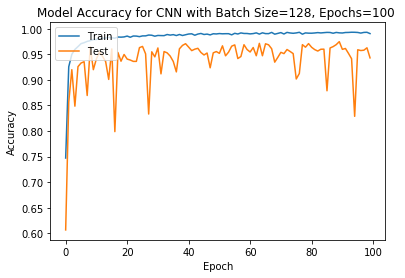

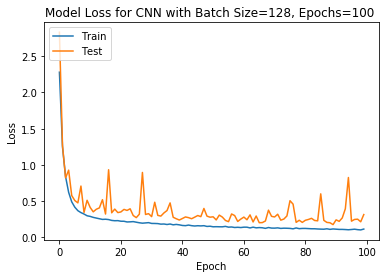

In [22]:
plt.plot(speechTrainData.history['acc'])
plt.plot(speechTrainData.history['val_acc'])
plt.title('Model Accuracy for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot Model  Loss
plt.plot(speechTrainData.history['loss'])
plt.plot(speechTrainData.history['val_loss'])
plt.title('Model Loss for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
def ConfusionMatrix(actual,predicts,numberClasses,classname):
    nc=numberClasses
    confmat=np.zeros([nc,nc])
    I = pd.Index(classname, name="rows")
    C = pd.Index(classname, name="columns")
    for ri in range (nc):
        value=[]
        trueIndex=np.where(actual[:,ri]==1)
        for j in range (len(trueIndex[0])):
            value.append(predict[trueIndex[0][j]])
        for rj in range (nc):
            confmat[ri][rj]=100*np.mean(value,axis=0)[rj]
    df = pd.DataFrame(data=confmat, index=I, columns=C)
    print(df)
    return

In [24]:
predict=model.predict(Xtrain)
print('Confusion Matrix for Train Data')
ConfusionMatrix(Ytrain,predict,num_classes,['Assamese','Bengali','Kannada','Malayalam','Punjabi','Rajasthani','Tamil','Telugu'])

Confusion Matrix for Train Data
columns      Assamese    Bengali    Kannada  Malayalam    Punjabi  Rajasthani  \
rows                                                                            
Assamese    99.195552   0.000901   0.752046   0.009984   0.007737    0.000890   
Bengali      0.008124  98.032057   0.004161   1.316904   0.001267    0.606257   
Kannada      0.021785   0.103592  99.589235   0.018076   0.001094    0.263258   
Malayalam    0.257613   1.305747   1.695912  94.408721   0.028688    1.915900   
Punjabi      0.003560   0.000860   0.038559   0.000304  99.947697    0.000249   
Rajasthani   0.000524   0.001171   0.016764   0.013067   0.000174   99.957687   
Tamil        0.176626   0.919111   0.776334   5.418352   0.032525    4.090144   
Telugu       0.858498   0.363610   4.847237   1.393628   0.050597    1.372417   

columns         Tamil     Telugu  
rows                              
Assamese     0.006713   0.027048  
Bengali      0.022952   0.008092  
Kannada      0.00

In [25]:
predict=model.predict(Xtest)
print('Confusion Matrix for Test Data')
ConfusionMatrix(Ytest,predict,num_classes,['Assamese','Bengali','Kannada','Malayalam','Punjabi','Rajasthani','Tamil','Telugu'])

Confusion Matrix for Test Data
columns      Assamese    Bengali    Kannada  Malayalam    Punjabi  Rajasthani  \
rows                                                                            
Assamese    98.683929   0.001316   1.227912   0.019749   0.009159    0.004082   
Bengali      0.007850  94.937927   0.008642   3.622266   0.003423    1.207763   
Kannada      0.010941   0.128485  98.740655   0.245615   0.015256    0.821417   
Malayalam    0.925662   2.459626   4.504875  86.679626   0.167555    2.952183   
Punjabi      0.005001   0.001710   0.389607   0.003061  99.369854    0.002188   
Rajasthani   0.001904   0.058635   0.689327   0.115941   0.018337   99.025369   
Tamil        0.384491   1.505485   2.811750   9.395788   0.030301    4.808902   
Telugu       1.759577   1.626887  10.600013   2.445072   0.241753    1.851595   

columns         Tamil     Telugu  
rows                              
Assamese     0.012779   0.041433  
Bengali      0.104821   0.107336  
Kannada      0.009